## Exploratory Data Analysis of Malware Detection in Network Traffic Data
## Submitted by: T15 Gnosis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('data/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv',sep='|')
df2 = pd.read_csv('data/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv',sep='|')
df3 = pd.read_csv('data/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv',sep='|')
df4 = pd.read_csv('data/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv',sep='|')
df5 = pd.read_csv('data/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv',sep='|')
df6 = pd.read_csv('data/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv',sep='|')
df7 = pd.read_csv('data/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv',sep='|')
df8 = pd.read_csv('data/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv',sep='|')
df9 = pd.read_csv('data/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv',sep='|')
df10 = pd.read_csv('data/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv',sep='|')

In [ ]:
dataset = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0)

### The dataset has been provided by Agung Pambudi through Kaggle with [Link](https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis). However this dataset was created as part of the Avast AIC laboratory with the funding of Avast Software. Link for the same is given [here](https://www.stratosphereips.org/datasets-iot23). There were total 10 data given to us.

## Brief Explanation of all the labels.
| No. |                      Label | Meaning                                                                                                                                                                                                                                                                            |
|-----|---------------------------:|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1   |                     Attack | this label indicates that there was some type of attack from the infected device to another host. Here we are labeling as attack to any flow that, by analysing its payload and behaviour, tries to take advantage of some vulnerable service.                                     |
| 2   |                     Benign | this label indicates that no suspicious por malicious activities where found in the connections.                                                                                                                                                                                   |
| 3   |                       C&C: | this label indicates that the infected device was connected to a CC server. This activity was detected in the analysis of the network malware capture because the connections to the suspicious server are periodic or our infected device is downloading some binaries from it    |
| 4   |                      DDoS: | this label indicates that a Distributed Denial of Service attack is being executed by the infected device. These traffic flows are detected as part of a DDoS attack because of the amount of flows directed to the same IP address.                                               |
| 5   | FileDownload               | this label indicates that a file is being downloaded to our infected device. This is detected by filtering connections with response bytes more than 3KB or 5KB, normally this is combined with some known suspicious destination port or destination IP known to be a C&C server. |
| 6   | PartOfAHorizontalPortScan: | this label indicates that the connections are used to do a horizontal port scan to gather information to perform further attacks.                                                                                                                                                  |
| 7   | Torii:                     | this label indicates that the connections have characteristics of a Torii botnet. This labeling decision was made with the same parameters as with Mirai but with the difference that this botnet family is less common.                                                           |

### Now let us have a look at all the features used to determine our final label

In [ ]:
dataset.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p         float64
id.resp_h          object
id.resp_p         float64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
local_resp         object
missed_bytes      float64
history            object
orig_pkts         float64
orig_ip_bytes     float64
resp_pkts         float64
resp_ip_bytes     float64
tunnel_parents     object
label              object
detailed-label     object
dtype: object

In [ ]:
dataset.isnull().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    20,18,871
dtype: int64

In [ ]:
sns.histplot(data=dataset, x="label")

custom_ticks = [0,1,2,3,4,5,6]
custom_labels = ['Benign', 'Malicious','DDoS','HPS','C&C','Attack','FileDownload']
plt.xticks(custom_ticks, custom_labels)
plt.show()

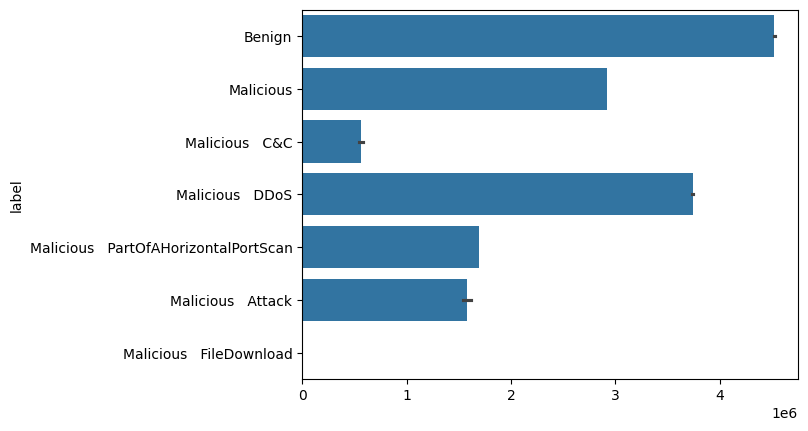

### Observation there are very less number of Malicious DDoS, Malicious Attack and Malicious File Download compared to Benign and other Malicious attacks which may cause class imbalance which will reflect upon the accuracy scores once the model is trained

In [ ]:
sns.kdeplot(dataset['resp_pkts'])
plt.xlim(left=-1, right=50)

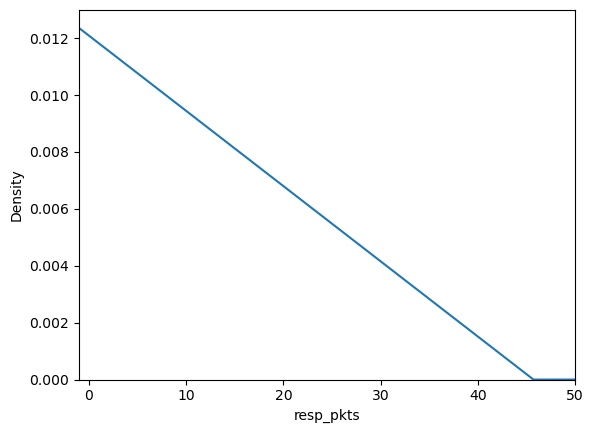

In [ ]:
dataset['orig_bytes'] = dataset['orig_bytes'].replace('-',0)
dataset['orig_bytes'] = dataset['orig_bytes'].astype('float')

In [ ]:
df['history'] = pd.factorize(df['history'])[0]
df['proto'] = pd.factorize(df['proto'])[0]
df['conn_state'] = pd.factorize(df['conn_state'])[0]
df['service'] = pd.factorize(df['service'])[0]
df['label'] = pd.factorize(df['label'])[0]

In [ ]:
df['duration'] = df['duration'].astype('float')
df['orig_bytes'] = df['orig_bytes'].astype('float')
df['resp_bytes'] = df['resp_bytes'].astype('float')

In [ ]:
df = df.fillna(0)

In [ ]:
sns.set(rc={'figure.figsize':(22,18)})

sns.heatmap(df.corr(), annot=True)

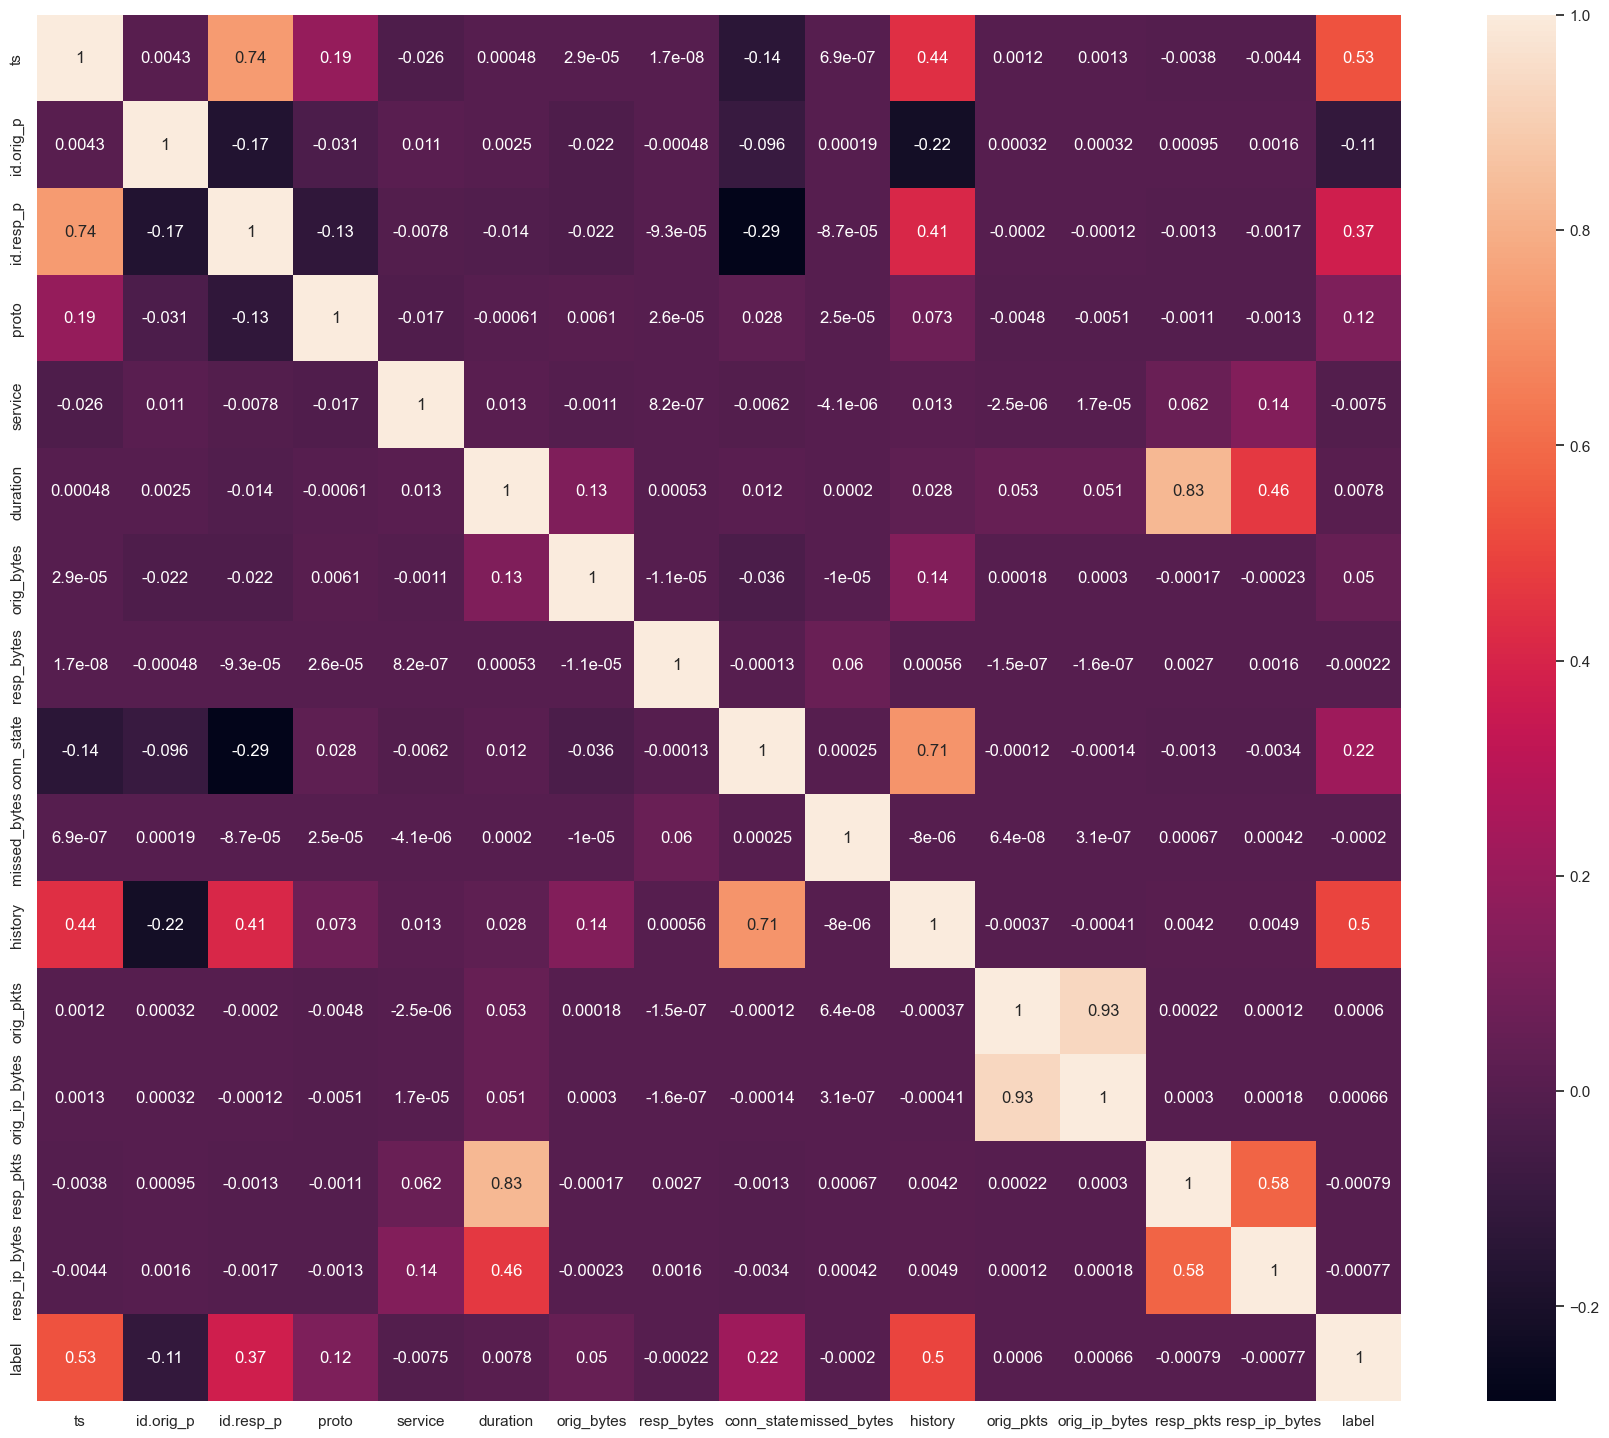

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["orig_ip_bytes", "id.orig_p", "id.resp_p"]):
    sns.boxplot(x=col, data=dataset, ax=axes[axid])

plt.tight_layout()
plt.show()

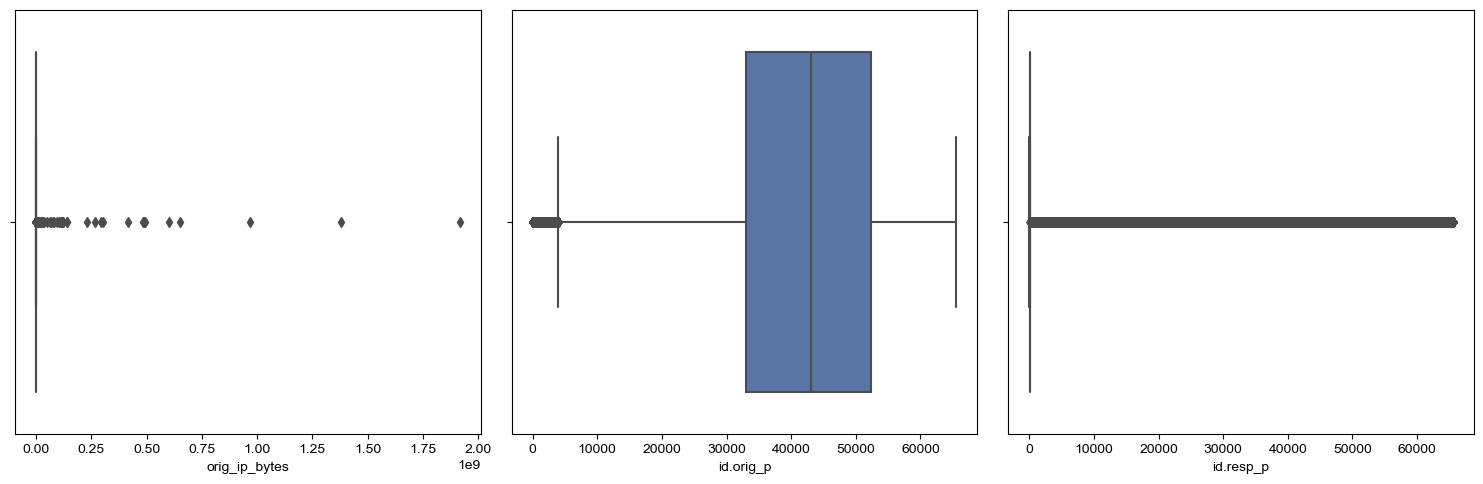

In [ ]:
dataset['proto'].value_counts().plot(kind='pie',autopct='%.2f')

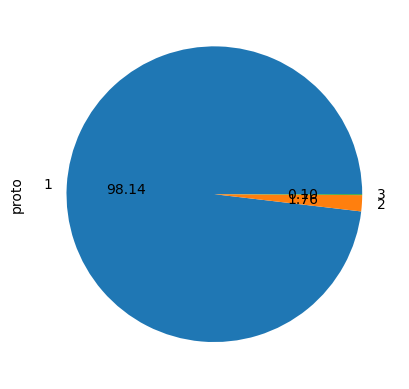"

### In above pie chart, the 'TCP' protocol is present in dataset with 98.14% and 'UDP' protocol is having 1.76% while 'ICMP' is having 0.10%

In [ ]:
sns.scatterplot(dataset['orig_pkts'])
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=dataset['orig_pkts'], y=dataset['resp_pkts'])

plt.xlabel("orig_pkts")
plt.ylabel("resp_pkts")
plt.title("Scatter Plot")

# Show the plot
plt.show()


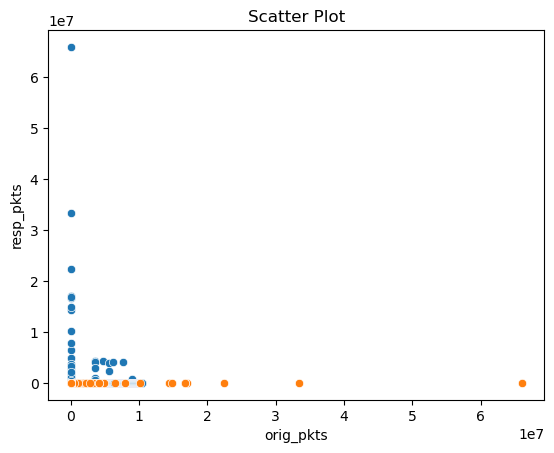

In [ ]:
sns.scatterplot(dataset['resp_pkts'])

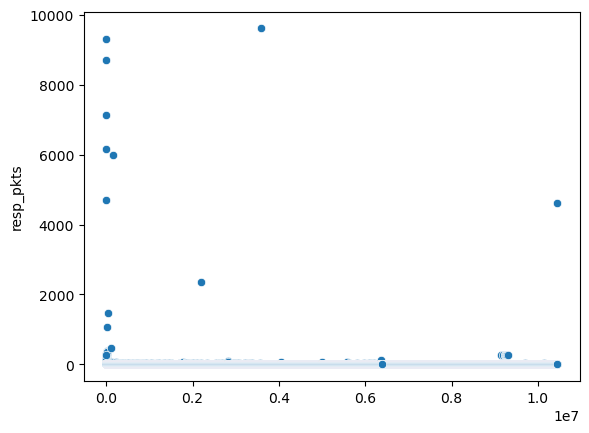

In [ ]:
dataset.describe()

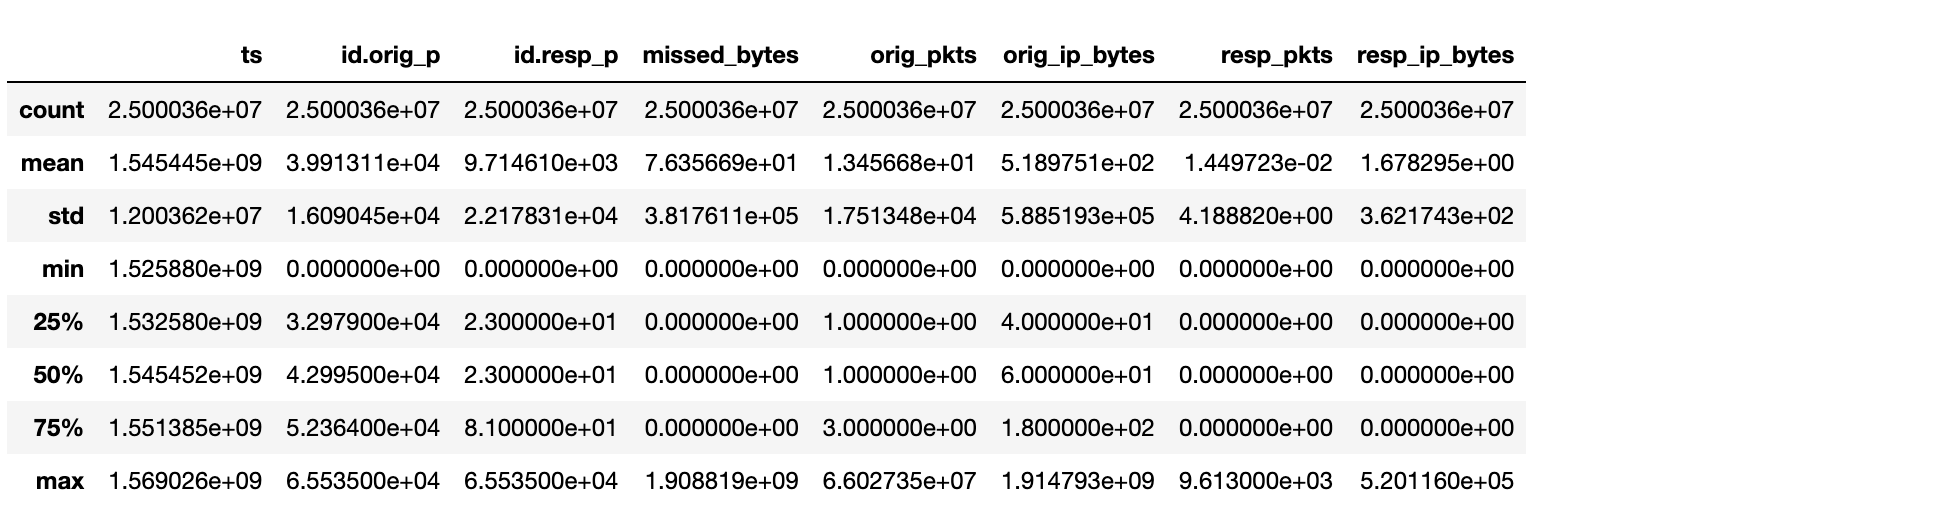

In [ ]:
sns.kdeplot(dataset['duration'])
plt.xlim(left=-10, right=500)

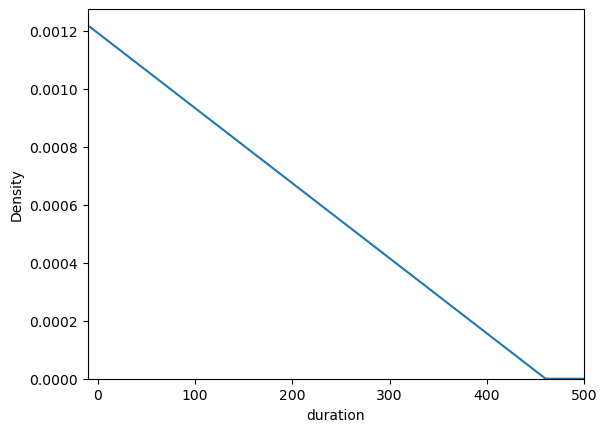